In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv(r'C:\Users\asuss\Downloads\cleaned_data.csv')

In [8]:
data.head()

,Name,Sector,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,Agilent Technologies Inc,Healthcare,"18,000",15.0,0.3,6.3,8.6,Low,1.0,11.0,Low
1,Advance Auto Parts Inc,Consumer Cyclical,"40,000",12.0,0.0,3.0,8.0,Moderate,2.0,4.0,Negligible
2,Apple Inc,Technology,"164,000",17.0,0.6,9.2,6.9,Significant,3.0,15.0,Low
3,Abbvie Inc,Healthcare,"50,000",28.0,1.1,9.9,16.8,Significant,3.0,55.0,Medium
4,Amerisourcebergen Corp,Healthcare,"46,000",12.0,1.3,5.2,5.6,Significant,3.0,5.0,Low


In [9]:
data.isnull().sum()

Name                      0
Sector                    0
Full Time Employees       0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Percentile       0
ESG Risk Level            0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    347 non-null    object 
 1   Sector                  347 non-null    object 
 2   Full Time Employees     347 non-null    object 
 3   Total ESG Risk score    347 non-null    float64
 4   Environment Risk Score  347 non-null    float64
 5   Governance Risk Score   347 non-null    float64
 6   Social Risk Score       347 non-null    float64
 7   Controversy Level       347 non-null    object 
 8   Controversy Score       347 non-null    float64
 9   ESG Risk Percentile     347 non-null    float64
 10  ESG Risk Level          347 non-null    object 
dtypes: float64(6), object(5)
memory usage: 29.9+ KB


In [13]:
data.shape

(347, 11)

In [14]:
data.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score,ESG Risk Percentile
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,21.484150,5.572622,6.733429,9.173775,2.051873,32.890490
std,7.390562,5.382806,2.154423,3.785671,0.817204,24.481315
min,9.000000,0.000000,3.000000,1.100000,1.000000,2.000000
25%,16.000000,1.450000,5.200000,6.700000,1.000000,12.500000
50%,21.000000,3.600000,6.200000,8.800000,2.000000,27.000000
75%,26.500000,8.750000,7.700000,11.600000,3.000000,50.500000
max,46.000000,24.100000,15.500000,21.000000,5.000000,96.000000


In [10]:
data.columns

Index(['Name', 'Sector', 'Full Time Employees', 'Total ESG Risk score',
       'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score',
       'Controversy Level', 'Controversy Score', 'ESG Risk Percentile',
       'ESG Risk Level'],
      dtype='object')

In [15]:
data['ESG Risk Level'] = data['ESG Risk Level'].map({'Low': 0, 'Negligible': 1, 'Medium': 2, 'High': 3, 'Severe': 4})

In [36]:
input=[4,5,6]
output=[10]
x=data.iloc[:,input]
y=data.iloc[:,output]
print(x)
print(y)

     Environment Risk Score  Governance Risk Score  Social Risk Score
0                       0.3                    6.3                8.6
1                       0.0                    3.0                8.0
2                       0.6                    9.2                6.9
3                       1.1                    9.9               16.8
4                       1.3                    5.2                5.6
..                      ...                    ...                ...
342                    12.9                    4.2                6.8
343                     2.0                    7.0                7.0
344                     4.0                    5.0                7.0
345                     4.5                    4.4               11.6
346                     1.4                    8.9                8.1

[347 rows x 3 columns]
     ESG Risk Level
0                 0
1                 1
2                 0
3                 2
4                 0
..              

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x,y)

c:\Users\asuss\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [42]:
 from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Confusion Matrix:
 [[21  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0  4]]


In [43]:
model.predict([[1.1,9.9,16.8]])

c:\Users\asuss\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [19]:
import pickle
with open('predict.pkl', 'wb') as file:
    pickle.dump(model, file)

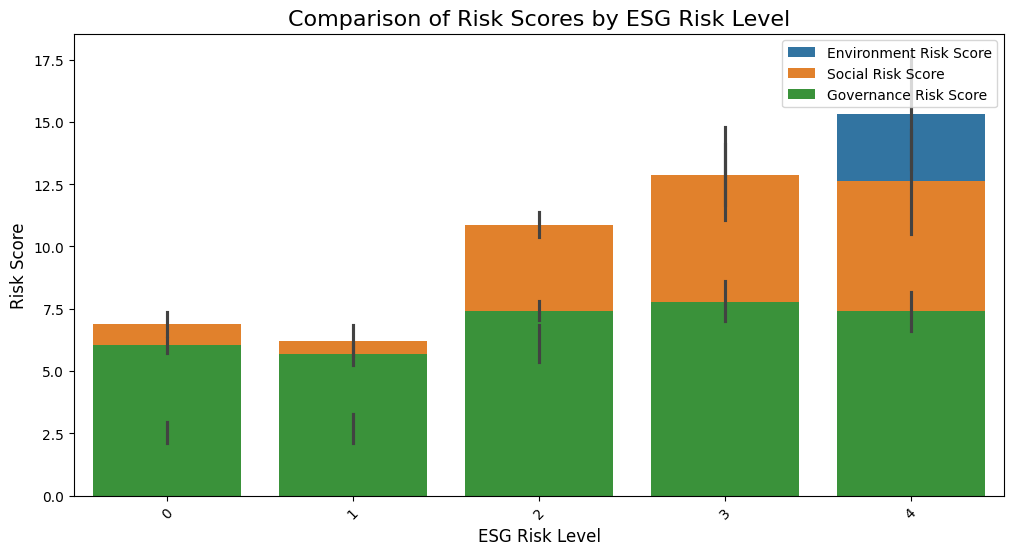

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='ESG Risk Level', y='Environment Risk Score', data=data, label='Environment Risk Score')
sns.barplot(x='ESG Risk Level', y='Social Risk Score', data=data, label='Social Risk Score')
sns.barplot(x='ESG Risk Level', y='Governance Risk Score', data=data, label='Governance Risk Score')
plt.xlabel('ESG Risk Level', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)
plt.title('Comparison of Risk Scores by ESG Risk Level', fontsize=16)
plt.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.show()


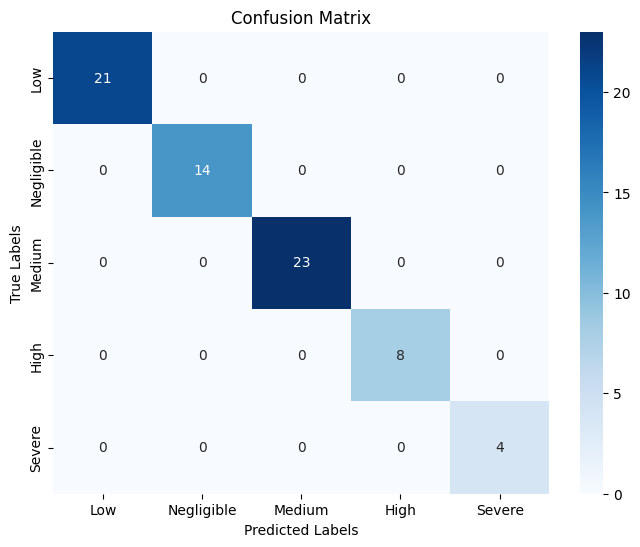

In [44]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=['Low', 'Negligible', 'Medium', 'High', 'Severe'], yticklabels=['Low', 'Negligible', 'Medium', 'High', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()